<a href="https://colab.research.google.com/github/Sneha9Pundir/TrendAura/blob/main/Hotel_booking_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing all the necessary libraries.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

***Reading our Hotel Bookings csv file.***

In [ ]:
Hotel_data=pd.read_csv('/content/Hotel Bookings (1) (1) (1).csv')

***Reading first 10 rows of our dataset.***

In [ ]:
Hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


***Displaying info about each columns in dataset like count of non null values ,count of null values,data types of column.***

In [ ]:
Hotel_data.info()
Hotel_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


***Prints all the existing columns.***

In [ ]:
Hotel_data.columns  # list of column names


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

***Prints the shape(number of rows and columns) of the dataset.***

In [ ]:
Hotel_data.shape  # rows and columns

(119390, 32)

***Displays the count of null values in each columns.***

In [ ]:
Hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


***Replacing the null values of children columns with 0.***

In [ ]:
Hotel_data['children'].fillna(0,inplace=True)


***Replacing the null values from country column with the most frequently visited country.***

In [ ]:
Hotel_data['country'].fillna(Hotel_data['country'].mode()[0], inplace=True)
#Replace with the most frequent country

***Replacing null values from agent column with 0.***

In [ ]:
Hotel_data['agent'].fillna(0, inplace=True)



***Dropping the company column as it conatins 94% null value and is irrelevant .***

In [ ]:
Hotel_data.drop('company', axis=1, inplace=True)


***Perfoming some operations on data.***

In [ ]:
# Total nights stayed

Hotel_data['total_nights'] = Hotel_data['stays_in_weekend_nights'] + Hotel_data['stays_in_week_nights']

# Convert date columns if needed
Hotel_data['reservation_status_date'] = pd.to_datetime(Hotel_data['reservation_status_date'])


***Vizualizing some realtionship among data.***

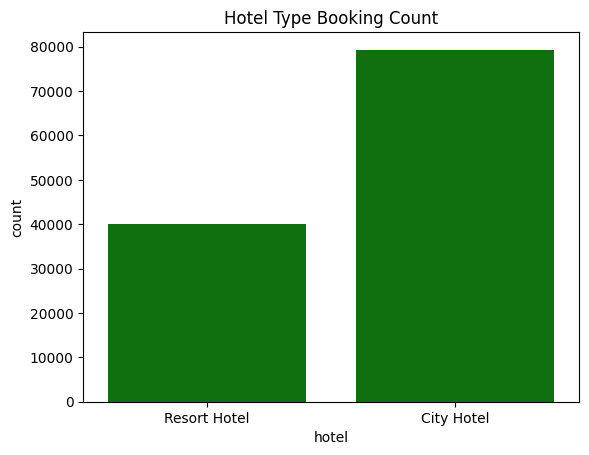

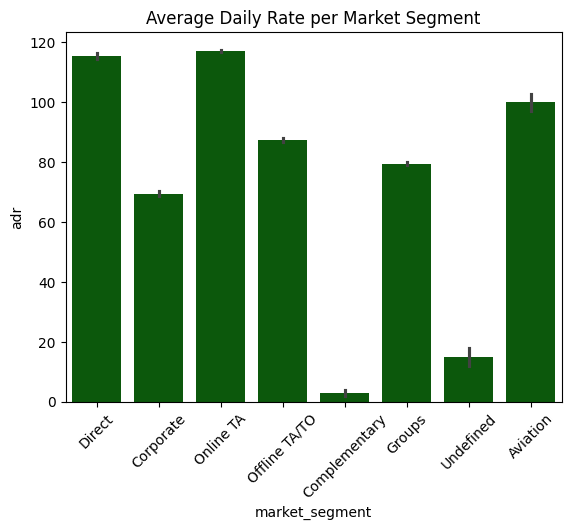

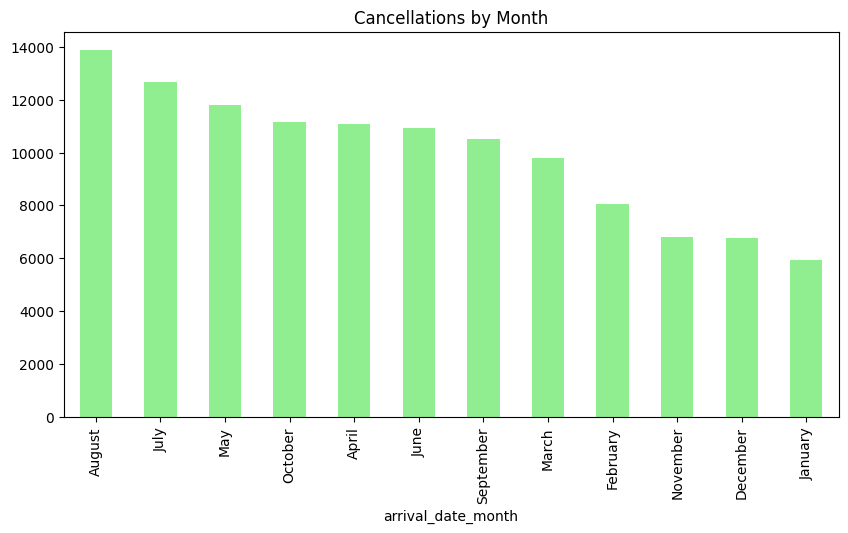

In [ ]:
# Count of bookings by hotel type
sns.countplot(x='hotel', data=Hotel_data,color='green')
plt.title("Hotel Type Booking Count")
plt.show()

# Average Daily Rate by Market Segment
sns.barplot(x='market_segment', y='adr', data=Hotel_data,color='darkgreen')
plt.xticks(rotation=45)
plt.title("Average Daily Rate per Market Segment")
plt.show()

# Cancellations by month
Hotel_data['arrival_date_month'].value_counts().plot(kind='bar', figsize=(10,5),color='lightgreen')
plt.title("Cancellations by Month")
plt.show()


# ***1️. When is the best time to book a room?***


**By analyzing the following data we get**.

Most bookings happen in August, followed by July ,June and September.
So the best time for hotel booking will be around months January,February etc.

Lead times are longer in summer months, meaning people plan and book early.



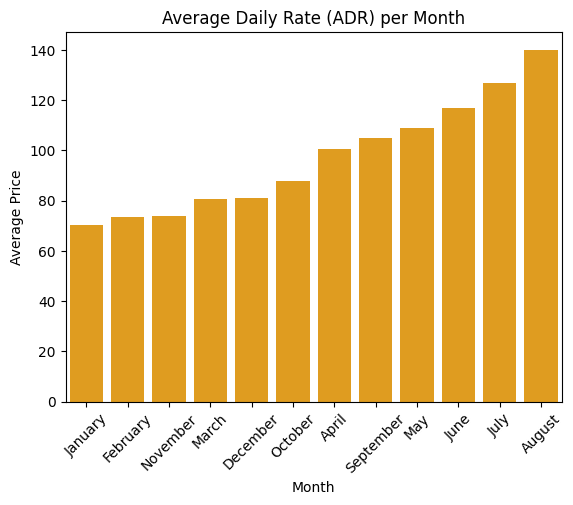

In [ ]:
# Check average price per month
#q1 when is the best time to book a room
#Which month has the lowest average price (ADR) for hotel bookings.
#Possibly also: Which month has the highest number of cancellations or most availability.

monthly_adr = Hotel_data.groupby('arrival_date_month')['adr'].mean().sort_values()#Group by Month and Calculate
#Average Price Sort Values (to find cheapest month)

# Visualize
sns.barplot(x=monthly_adr.index, y=monthly_adr.values,color='orange')
plt.title("Average Daily Rate (ADR) per Month")
plt.ylabel("Average Price")
plt.xlabel("Month")
plt.xticks(rotation=45)

plt.show()
#Each bar = average room price for that month.
#Shorter bars = cheaper months to book 📉




# **2️. How does length of stay affect price?**




Guests who stay longer often pay a lower ADR (average daily rate) — possibly due to discounts or packages.

Short stays, especially on weekends, show higher ADR.

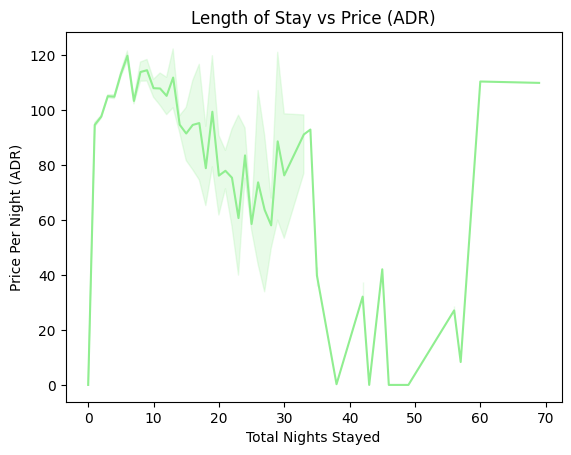

In [ ]:
# Q2: How does length of stay affect price?

Hotel_data['total_nights'] = Hotel_data['stays_in_weekend_nights'] + Hotel_data['stays_in_week_nights']

#You'll see if longer stays have lower/higher prices per night.
#If there's a downward trend, it means longer stays might get cheaper rates.

sns.lineplot(x='total_nights', y='adr', data=Hotel_data,color='lightgreen')
plt.title("Length of Stay vs Price (ADR)")
plt.xlabel("Total Nights Stayed")
plt.ylabel("Price Per Night (ADR)")
plt.show()


# ***3️. What causes a surge in special requests?***

Special requests are highest during the summer (May–August).

Reapeated guests also tends to make more special requets.

Families and longer-stay guests tend to make more special requests.

Contract type cutomers are more likely to make special requets than transient party.

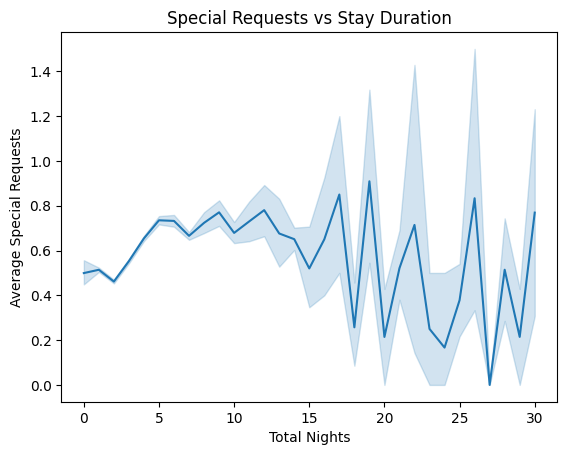

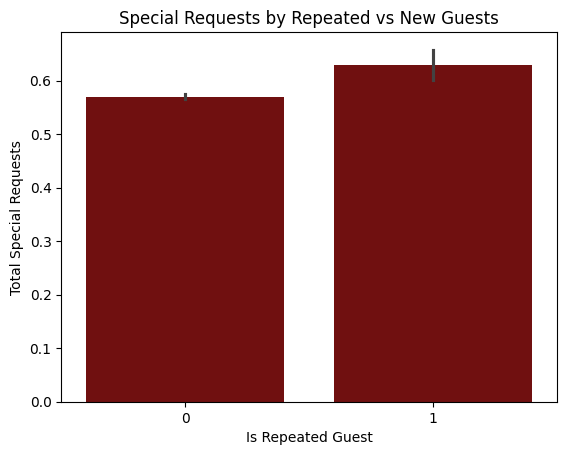

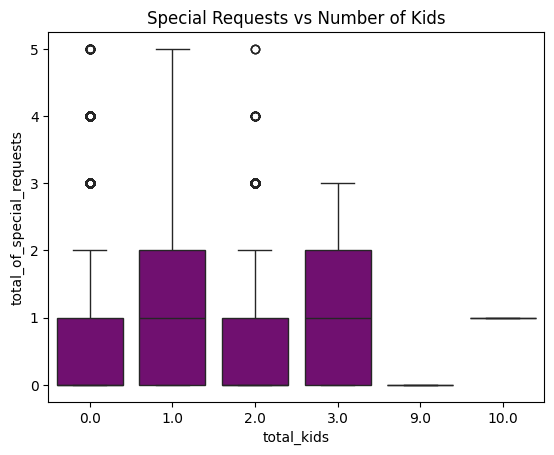

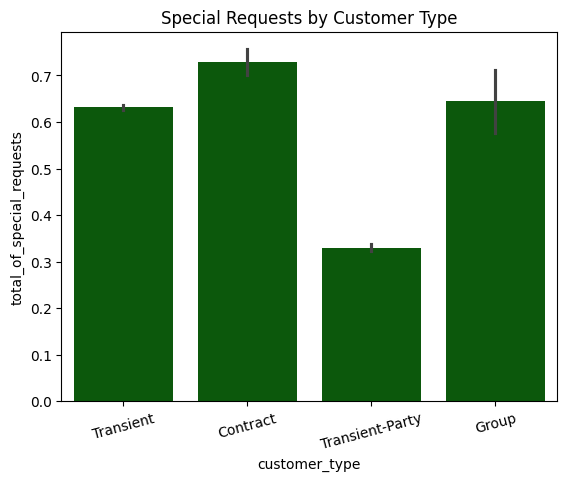

In [ ]:
#Q3: What causes a surge in special requests?
#We want to discover what factors lead guests to make more special requests, such as:
#Do longer stays lead to more requests?
Hotel_data['total_nights'] = Hotel_data['stays_in_weekend_nights'] + Hotel_data['stays_in_week_nights']

sns.lineplot(x='total_nights', y='total_of_special_requests', data=Hotel_data[Hotel_data['total_nights'] <= 30])
plt.title("Special Requests vs Stay Duration")
plt.xlabel("Total Nights")
plt.ylabel("Average Special Requests")
plt.show()

#Are repeat guests more demanding?
#0 = New Guest, 1 = Repeated Guest

sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=Hotel_data,color='maroon')
plt.title("Special Requests by Repeated vs New Guests")
plt.xlabel("Is Repeated Guest")
plt.ylabel("Total Special Requests")
plt.show()

#Do families with childrens make more requests?
# Combine children + babies
Hotel_data['total_kids'] = Hotel_data['children'] + Hotel_data['babies']
sns.boxplot(x='total_kids', y='total_of_special_requests', data=Hotel_data,color='purple')
plt.title("Special Requests vs Number of Kids")
plt.show()

#Which customer type makes the most?
sns.barplot(x='customer_type', y='total_of_special_requests', data=Hotel_data,color='darkgreen')
plt.title("Special Requests by Customer Type")
plt.xticks(rotation=15)
plt.show()




# ***4️. How do demographics affect bookings?***

Families with children and repeated guests behave differently:

>Families → longer stays, more requests

>Repeated guests → fewer cancellations

Corporate bookings often have fewer requests and shorter stays.

According to country wise bookings PTR have highest booking numbers.

Transient customer type have more bookings than contract type.

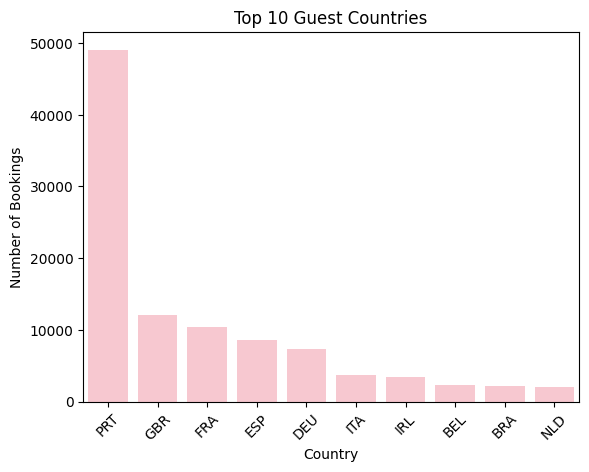

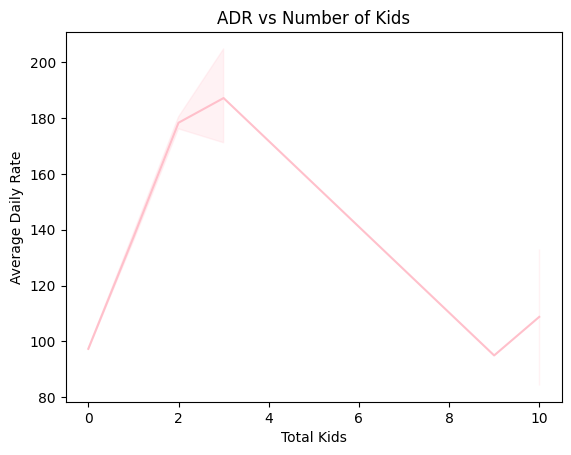

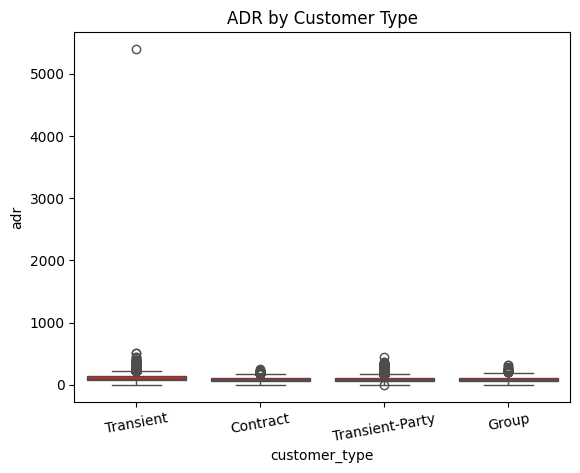

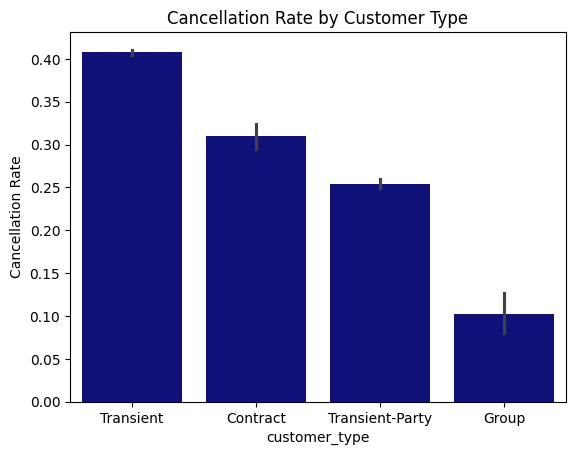

In [ ]:
#How do demographics affect bookings?
#Understand how age, country, number of children/babies, or customer types influence:
#Booking behavior

#1 Step 1: Country-wise Booking Count
top_countries = Hotel_data['country'].value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values,color='pink')
plt.title("Top 10 Guest Countries")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

#2  Do Families Book Differently?
Hotel_data['total_kids'] = Hotel_data['children'] + Hotel_data['babies']

sns.lineplot(x='total_kids', y='adr', data=Hotel_data,color='pink')
plt.title("ADR vs Number of Kids")
plt.xlabel("Total Kids")
plt.ylabel("Average Daily Rate")
plt.show()

#3Customer Type vs Booking Behavior
sns.boxplot(x='customer_type', y='adr', data=Hotel_data,color='red')
plt.title("ADR by Customer Type")
plt.xticks(rotation=10)
plt.show()

sns.barplot(x='customer_type', y='is_canceled', data=Hotel_data,color='darkblue')
plt.title("Cancellation Rate by Customer Type")
plt.ylabel("Cancellation Rate")
plt.show()


# ***5️. When are bookings typically made?***

Most people book 30–90 days in advance.

Bookings for summer months are made well in advance (long lead time).

Last-minute bookings are more common in off-season.

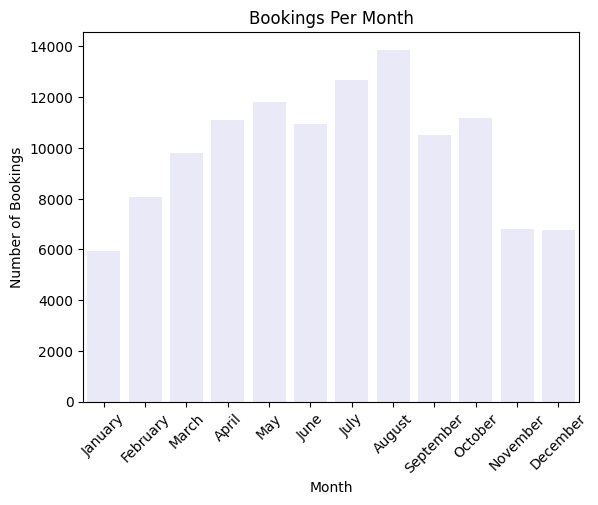

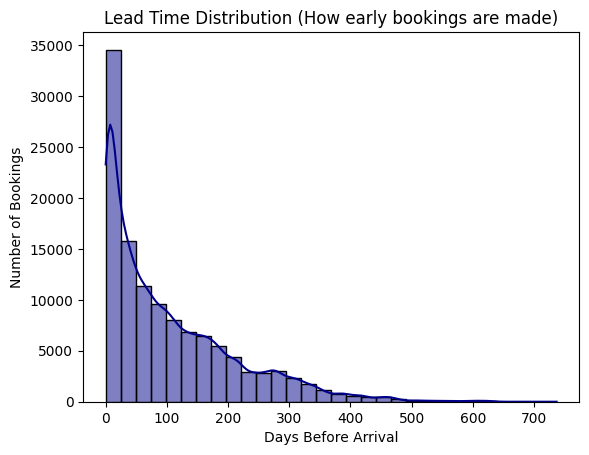

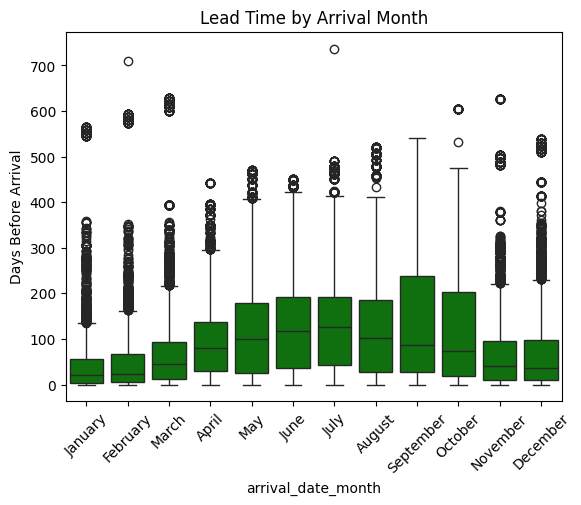

In [ ]:
#Q5: When Are Bookings Typically Made?
# Convert month names to ordered categories
# Step 1: Look at Booking Month
import pandas as pd
Hotel_data['arrival_date_month'] = pd.Categorical(Hotel_data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

#tep 2: Plot Number of Bookings Per Month
import seaborn as sns
import matplotlib.pyplot as plt

monthly_bookings = Hotel_data['arrival_date_month'].value_counts().sort_index()

sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values,color='lavender')
plt.title("Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


#Step 3: Check Booking Lead Time
sns.histplot(Hotel_data['lead_time'], bins=30, kde=True,color='darkblue')
plt.title("Lead Time Distribution (How early bookings are made)")
plt.xlabel("Days Before Arrival")
plt.ylabel("Number of Bookings")
plt.show()
#This shows how early people usually book.

#Step 4: Combine Both – Booking Time vs Arrival Month

sns.boxplot(x='arrival_date_month', y='lead_time', data=Hotel_data,color='green')
plt.title("Lead Time by Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Days Before Arrival")
plt.show()



In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Hotel_booking_data_analysis.ipynb

[NbConvertApp] Converting notebook /content/Hotel_booking_data_analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1028695 bytes to /content/Hotel_booking_data_analysis.html
